# Untersuchung Umfrage mprove ws 18/19 

msprove Projekt - emissionsfreier Campus

Inhalt der Umfrage: zum Pendeln genutzte Verkehrsmittel 

791 Teilnehmende Personen

the excel sheet of the survey can be found [here](https://www.dropbox.com/s/dj00w410nx7qm4z/umfrage.xlsx?dl=0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import re
import seaborn as sbn

load data into DataFrame

In [ ]:
data = pd.read_excel (r'umfrage.xlsx')
df = pd.DataFrame(data)
df.head()

,Timestamp,Rolle,Abschluss,Semester,Postleitzahl,Verkehrsmittel,Weglänge,Häufigkeit,Entfernung,Falls Sie mit dem motorisierten Individualverkehr zur HTWG gelangen: Warum nutzen Sie nicht den Ã¶ffentlichen Personennahverkehr? [Zu teuer],Falls Sie mit dem motorisierten Individualverkehr zur HTWG gelangen: Warum nutzen Sie nicht den Ã¶ffentlichen Personennahverkehr? [ÃœberfÃ¼llte Verkehrsmittel],Falls Sie mit dem motorisierten Individualverkehr zur HTWG gelangen: Warum nutzen Sie nicht den Ã¶ffentlichen Personennahverkehr? [Dauert zu lange],Falls Sie mit dem motorisierten Individualverkehr zur HTWG gelangen: Warum nutzen Sie nicht den Ã¶ffentlichen Personennahverkehr? [Schlechte Anbindung an die HTWG],Falls Sie mit dem motorisierten Individualverkehr zur HTWG gelangen: Warum nutzen Sie nicht den Ã¶ffentlichen Personennahverkehr? [Grund ist nicht aufgefÃ¼hrt],Wenn bei obiger Frage ihr Grund nicht aufgefÃ¼hrt ist ergÃ¤nzen Sie bitte hier.,Fahrzeug,Wenn obige Frage mit JA beantwortet wurde: Welchen Kraftstoffverbrauch weist das Fahrzeug im Durchschnitt auf 100 km auf?,Ebike,Zeitfahrkarte
0,2018/12/07 1:08:41 PM MEZ,Lehrpersonal,kein Abschluss angestrebt.,NaN,78315,Fahrer motorisierter Individualverkehr (Auto/M...,16 km,3,1,Trifft voll und ganz zu,Trifft eher nicht zu,Trifft eher nicht zu,Trifft eher nicht zu,Trifft eher nicht zu,NaN,Ja,"6,6",Nein,Nein
1,2018/12/07 1:26:54 PM MEZ,Sonstiges Personal,Dr.,NaN,78467 (Wollmatingen-Fürstenberg),Fahrrad,4,2,"0,5",NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,Nein,Nein
2,2018/12/07 1:27:33 PM MEZ,Sonstiges Personal,Kein Abschluss da Personal,NaN,78462 (Paradies-Altstadt),Fahrrad,2km,4,"0,1",NaN,NaN,NaN,NaN,NaN,NaN,Ja,7L,Nein,Nein
3,2018/12/07 1:30:50 PM MEZ,Sonstiges Personal,Kein Abschluss da Personal,NaN,78476 Allensbach,Fahrer motorisierter Individualverkehr (Auto/M...,15,5,"0,1",Trifft eher nicht zu,Trifft eher zu,Trifft voll und ganz zu,Trifft eher zu,NaN,NaN,Ja,7,Nein,Nein
4,2018/12/07 1:31:32 PM MEZ,Sonstiges Personal,Kein Abschluss da Personal,NaN,78464 (Egg-Staad),Fahrrad,2 km,5,"0,5",NaN,NaN,NaN,NaN,NaN,NaN,Ja,"7,5/100km",Nein,Nein


In [ ]:
df.shape

(791, 19)

##Übersicht HTWGler

In [ ]:
roles = df.Rolle.value_counts()
roles

Student                539
Lehrpersonal           123
Verwaltungspersonal     70
Sonstiges Personal      59
Name: Rolle, dtype: int64

In [ ]:
labels = roles.index.tolist()
roles = roles.tolist()

In [ ]:
df.Abschluss.value_counts()

Bachelor                                                       385
Kein Abschluss da Personal                                     228
Master                                                         160
Doktor                                                           2
Promotion                                                        2
Diplom                                                           2
Bin bereits fertig mit meinem Studium                            1
Zweitstudienabschluss                                            1
Dr.-Ing.                                                         1
bereits MBA_abschluss                                            1
Professur                                                        1
unlogisches Pflichtfeld; bin wie oben angegeben Mitarbeiter      1
habe schon zwei AbschlÃ¼sse                                      1
kein weiterer Abschluss                                          1
kein Abschluss angestrebt.                                    

Hinweis: Manche haben die Frage falsch verstanden: Es geht um den angestrebten Abschluss, nicht um den, welcher aktuell vorhanden ist. 

In [ ]:
countBachelor = 0
countMaster = 0

for i in df.index:
    if df.Rolle[i] == "Student":
      if df.Abschluss[i] == "Master":
        countMaster += 1
      elif df.Abschluss[i] == "Bachelor":
        countBachelor += 1
      else:
        print(i)

print(countMaster, countBachelor)

763
155 383


Student                538 , davon 155 Masteranden und 383 Bacheloranden

Lehrpersonal           123

Verwaltungspersonal     70

Sonstiges Personal      59

In [ ]:
# replace Student with Bachelor and Master
del labels[0]
del roles[0]
labels.append("Bachelor")
roles.append(countBachelor)
labels.append("Master")
roles.append(countMaster)

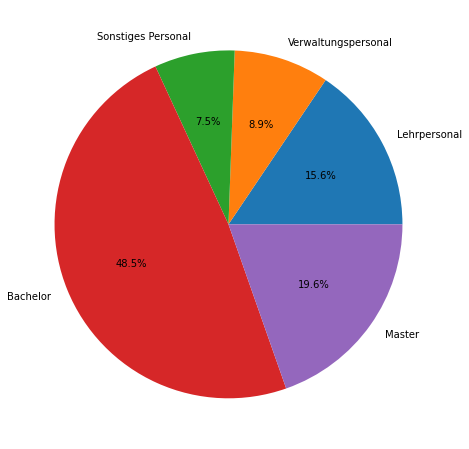

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(roles, labels = labels, autopct='%1.1f%%')
plt.show()

## Durchschnitts-HTWGler

In [ ]:
print(df.Rolle.value_counts().idxmax())
print(df.Abschluss.value_counts().idxmax())

Student
Bachelor


In [ ]:
# df.Verkehrsmittel.unique()

In [ ]:
autoArray = []
fussArray = []
motorradArray = []
bahnArray = []
busArray = []
fahrradArray = []

for i in df.index:
  if "auto" in df.Verkehrsmittel[i].lower():
    autoArray.append(df.Weglänge[i])
  if "FuÃŸ" in df.Verkehrsmittel[i]:
    fussArray.append(df.Weglänge[i])
  if "motorrad" in df.Verkehrsmittel[i]:
    motorradArray.append(df.Weglänge[i])
  if "bahn" in df.Verkehrsmittel[i].lower():
    bahnArray.append((df.Weglänge[i]))
  if "bus" in df.Verkehrsmittel[i].lower():
    busArray.append((df.Weglänge[i]))
  if "fahrrad" in df.Verkehrsmittel[i].lower() or "e-bike" in df.Verkehrsmittel[i].lower() or "ebike" in df.Verkehrsmittel[i] or "pedelec" in df.Verkehrsmittel[i]:
    fahrradArray.append((df.Weglänge[i]))

In [ ]:
print(len(autoArray))
print(len(fussArray))
print(len(motorradArray))
print(len(bahnArray))
print(len(busArray))
print(len(fahrradArray))

185
243
0
99
150
511


In [ ]:
# correct data in Weglänge
for i in df.index:
  if isinstance(df.Weglänge[i], int):
    new_float = float(df.Weglänge[i])
    df.Weglänge[i] = new_float
  elif isinstance(df.Weglänge[i], str):
    if "," in df.Weglänge[i]:
      df.Weglänge[i] = df.Weglänge[i].replace(",", ".")
    # find distance number in string with regular expression
    distance = re.search("\d+(\.\d+)?", df.Weglänge[i]).group(0)
    df.Weglänge[i] = float(distance)

print(df.Weglänge.median())
print(df.Weglänge.mean())

3.0
9.751721854304634


In [ ]:
df.Fahrzeug.value_counts()

Ja      471
Nein    320
Name: Fahrzeug, dtype: int64

In [ ]:
df.Postleitzahl.value_counts()

78467 (Wollmatingen-Fürstenberg)    227
78462 (Paradies-Altstadt)           202
78464 (Egg-Staad)                   101
78315                                33
78465 (Dingelsdorf)                  20
                                   ... 
78465 Dettingen                       1
78224  Singen                         1
70180                                 1
78315 Radolfzell                      1
78262                                 1
Name: Postleitzahl, Length: 112, dtype: int64

In [ ]:
df.Postleitzahl.value_counts().idxmax()

'78467 (Wollmatingen-Fürstenberg)'

Der/Die Durchschnittliche HTWGlerIn ist **BachelorstudentIn**, wohnt **3 km** von der Hochschule entfernt in **78467 Wollmatingen-Fürstenberg**, kommt mit dem **Fahrrad** zur Hochschule und hat ein **Fahrzeug**

(die 3km entsprechen tatsächlich der ungefähren Entfernung zwischen HTWG und dem Stadtteil Fürstenberg)

## Anteil E-Bikes an Fahrrädern

In [ ]:
countBike = 0 
countEBike = 0
for i in df.index:
  if "bike" in df.Verkehrsmittel[i] or "Bike" in df.Verkehrsmittel[i] or "Fahrrad" in df.Verkehrsmittel[i] or "fahrrad" in df.Verkehrsmittel[i]:
    countBike += 1
    if df.Ebike[i] == "Ja" or df.Ebike[i] == "ja":
      countEBike += 1

print("Anzahl Fahrräder: (" + str(countBike))
print("davon E-Bikes: " + str(countEBike))
percentage_ebike = str(countEBike/countBike*100)[0:4] + " %"
percentage_normal_bike = str((countBike-countEBike)/countBike*100)[0:5] + " %"
print("Prozentualer Anteil: " + percentage_ebike)

print("Anzahl E-Bikes: " + str(df.Ebike.value_counts()))


Anzahl Fahrräder: (511
davon E-Bikes: 22
Prozentualer Anteil: 4.30 %
Anzahl E-Bikes: Nein    759
Ja       32
Name: Ebike, dtype: int64


Von 511 Fahrradfahreren besitzen 22 ein E-Bike. 10 weitere Personen besitzen ein E-Bike, nutzen dies jedoch nicht um zur HTWG zu gelangen.

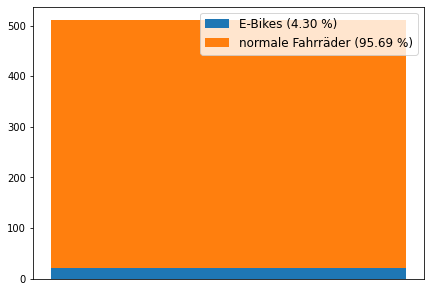

In [ ]:
x = [22]
y = [511-22]

fig, ax = plt.subplots(figsize=(7,5))

ax.bar(0, x, label="E-Bikes (" + percentage_ebike + ")")
ax.bar(0, y, bottom=x, label="normale Fahrräder (" + percentage_normal_bike + ")")

ax.set_xticks(x)
ax.legend(prop={'size': 12})
plt.show()

Anteil E-Bikes ist sehr gering, wahrscheinlich aufgrund des hohen Anschaffungspreises

## Verteilung Entfernung und Verkehrsmittel

In [ ]:
allArray = [autoArray, fussArray, motorradArray, bahnArray, busArray, fahrradArray]

In [ ]:
for i in range(len(allArray)):
  for j in range(len(allArray[i])):
    if isinstance(allArray[i][j], int):
      allArray[i][j] = float(allArray[i][j])
    elif isinstance(allArray[i][j], str):
      if "," in allArray[i][j]:
        allArray[i][j] = allArray[i][j].replace(",", ".")
      # find distance number in string with regular expression
      distance = re.search("\d+(\.\d+)?", allArray[i][j]).group(0)
      allArray[i][j] = float(distance)

In [ ]:
# plot histogram
# for i in range(len(allArray)):
#   fig, ax = plt.subplots(figsize=(30,6))
#   ax.hist(allArray[i], bins=100)
#   plt.show()

KDE with Gaussian Kernel

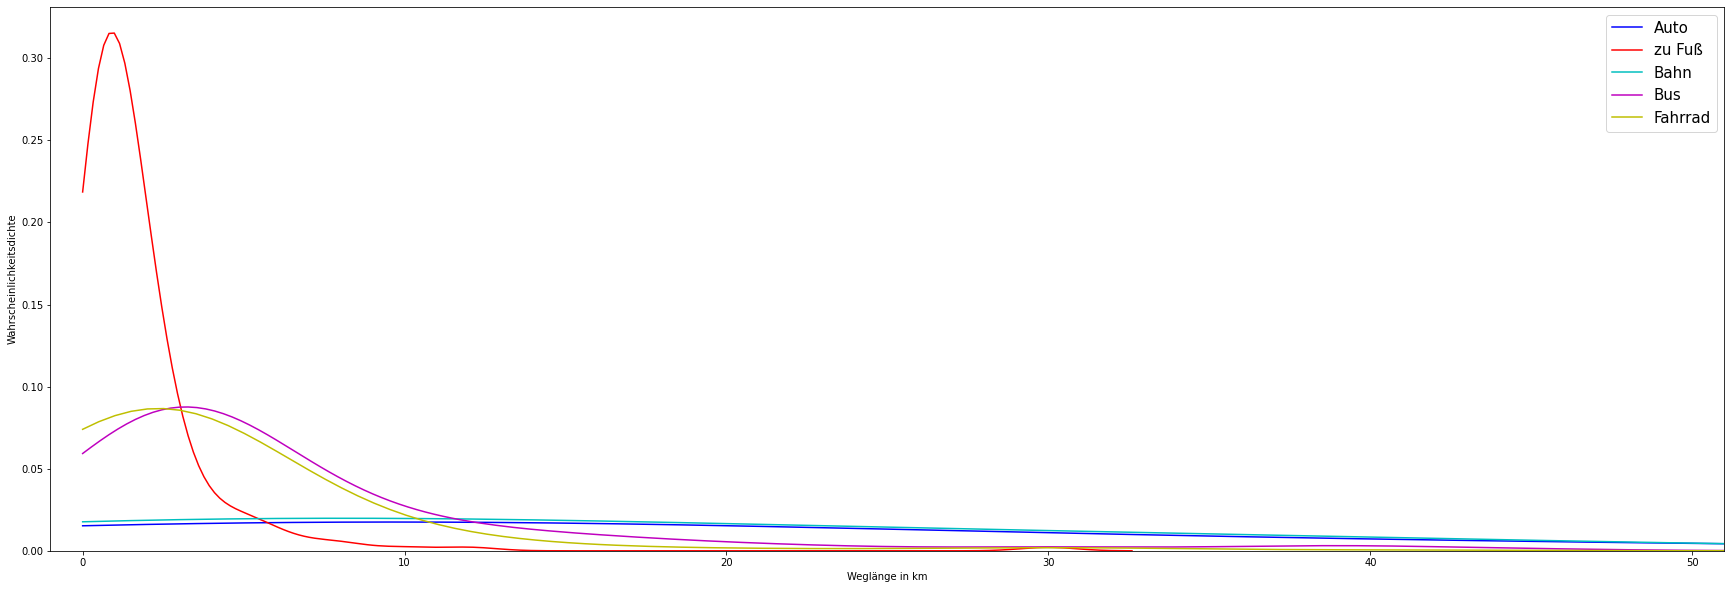

In [ ]:
label = ["Auto", "zu Fuß", "Motorrad", "Bahn", "Bus", "Fahrrad"]
color = ['b', 'r', 'g', 'c', 'm', 'y']

kde_data = allArray
fig, ax = plt.subplots(figsize=(30,10))

# kde with bounded support
for i in range(len(kde_data)):
  sbn.kdeplot(kde_data[i], color=color[i], Label=label[i], clip=(0, 100))

plt.xlabel('Weglänge in km')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.legend(prop={'size': 15})
plt.xlim([-1, 51])
plt.show()

## Besitz Fahrzeug im Bezug auf Weglänge

In [ ]:
# prepare dataframe for violinplot
df['Weglänge'] = df['Weglänge'].astype(float)

df.insert(0, ' ', ' ')
df.insert(0, 'Rolle_simple', None)
for i in df.index:
  if df.Rolle[i] != "Student":
    df.Rolle_simple[i] = "Personal"
  else:
    df.Rolle_simple[i] = "Student"

df['Rolle_simple'] = df.Rolle_simple.astype('category')

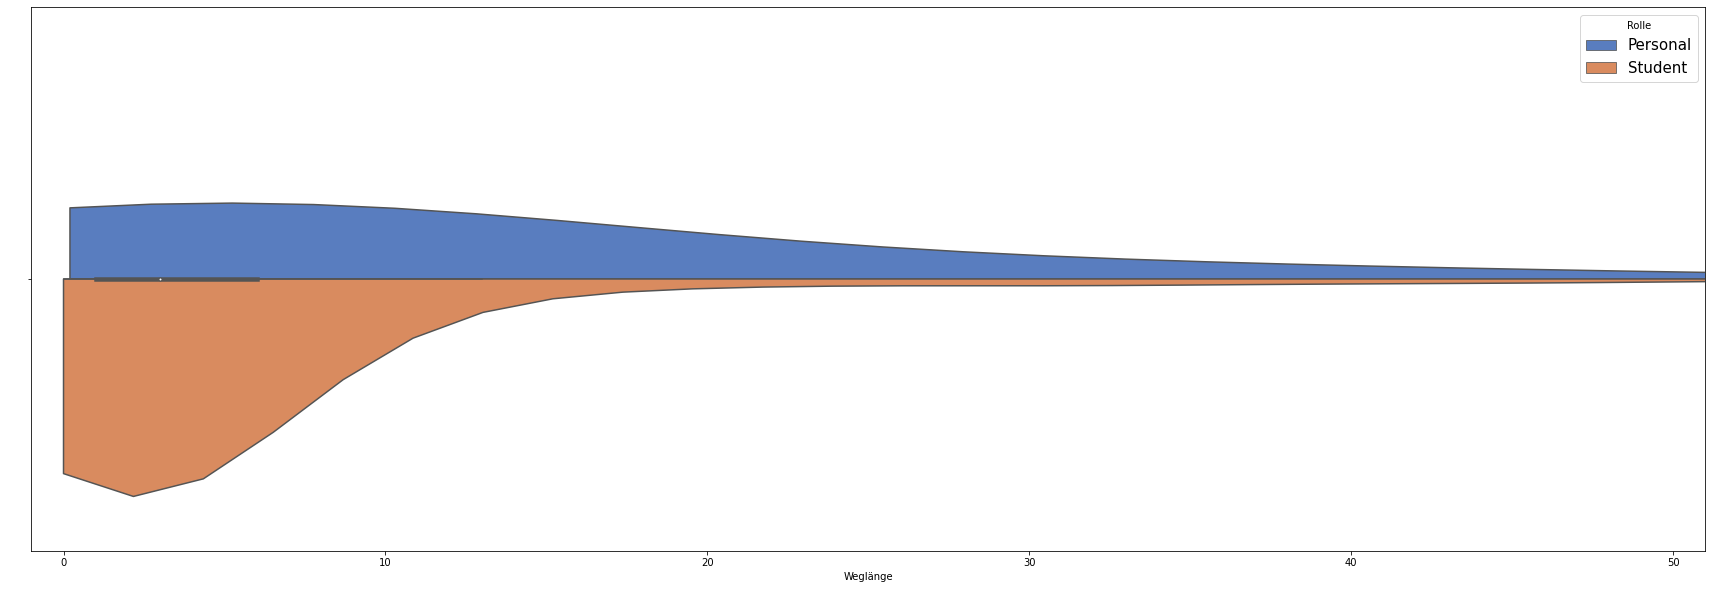

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

ax = sbn.violinplot(x="Weglänge", y=" ", hue="Rolle_simple",
                    data=df, palette="muted", split=True, cut=0)

plt.legend(title="Rolle", prop={'size': 15})
plt.xlim([-1, 51])
plt.show()

Studenten wohnen näher an HTWG, da viele womöglich in Studentenwohnheimen wohnen, die nahe and der Hochschule wohnen
Es gibt Personal, die nur wenige Wochentage an der HTWG sind und desshalb womöglich weiter entfernt wohnen und zur HTWG pendeln

## Weniger anspruchsvolle Facts

### Wieviele fahren Fahrrad obwohl sie ein Auto zur Verfügung haben

In [ ]:
bikeCarCounter = 0
for i in df.index:
  if "bike" in df.Verkehrsmittel[i] or "Bike" in df.Verkehrsmittel[i] or "Fahrrad" in df.Verkehrsmittel[i] or "fahrrad" in df.Verkehrsmittel[i]:
    if df.Fahrzeug[i] == "Ja":
      bikeCarCounter +=1

print(bikeCarCounter)

271


Es gibt 271 Personen, welche regelmäßig Fahrrad zur HTWG fahren, obwohl sie ein Kraftfahrzeug besitzten.

### Nutzung der vorhandenen Zeitfahrkarte für die HTWG

In [ ]:
karteCounter = 0
bahnBusCounter = 0

for i in df.index:
  if df.Zeitfahrkarte[i] == "Ja":
    karteCounter += 1
    if "bus" in df.Verkehrsmittel[i].lower():
      bahnBusCounter += 1
    elif "bahn" in df.Verkehrsmittel[i].lower():
      bahnBusCounter += 1

print(karteCounter, bahnBusCounter)

287 183


Insgesamt **287** HTWGler besitzen eine Zeitfahrkarte, jedoch nutzen nur **183** hiervon diese regelmäßig, um zur Hochschule zu gelangen.